# CMPE 255-04, Spring 2023 
# Assignment #3-1

# Project Title

**Author:** Kapil Wanaskar [016649880]  

**Date:** March 25, 2023  

**Email:** kapil.wanaskar@sjsu.edu

**Institution:** San Jose State University

Release on March 22nd, 2023

Due 11:59pm on April 9th, 2023

Notes

This assignment should be submitted in Canvas as a format of ipython notebook
(assignment_3_yourFirstName_LastnName.ipynb).

No late assignments will be accepted.

You may collaborate on homework but must write independent code/solutions. 

Copying and other forms of cheating 
will not be tolerated and will result in a zero score for the homework (minimal penalty) or a failing grade for the course.
Your work will be graded in terms of correctness, completeness, and clarity, not just the answer. 

Thus, correct answers with no or poorly written supporting steps may receive very little credit.


## 1. (3 pts) Predict probability of admission using Logistic Regression

Please download ex2data1.text file.

You will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 

You have historical data from previous applicants that you can use as a training data for logistic regression. 

For each training example, you have the applicant’s scores on two exams and the admissions decision. 

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

### 1-1. Visualize the data Before starting to implement any machine learning algorithm, it is good to visualize the data if possible. 

Please display a figure like below, where the axes are the two exam scores,
y-axis = "Exam 2 score"
x-axis = "Exam 1 score"

 and the positive [Admitted] and negative [Not Admitted] examples are shown with different markers.


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the text file
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1 score', 'Exam 2 score', 'Admitted'])
data


,Exam 1 score,Exam 2 score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


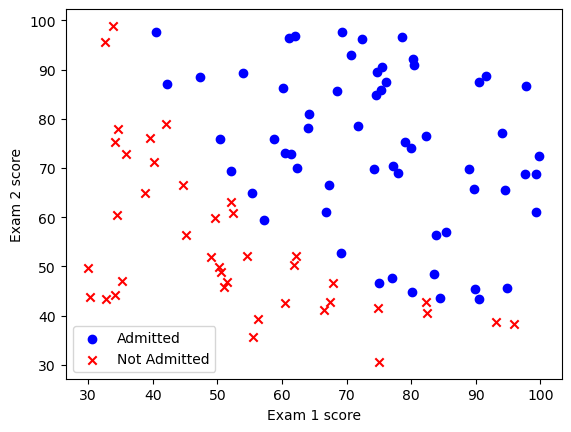

In [54]:
# Separate admitted and not admitted students
admitted = data[data['Admitted'] == 1]
not_admitted = data[data['Admitted'] == 0]

# Create a scatter plot
plt.scatter(admitted['Exam 1 score'], admitted['Exam 2 score'], c='blue', marker='o', label='Admitted')
plt.scatter(not_admitted['Exam 1 score'], not_admitted['Exam 2 score'], c='red', marker='x', label='Not Admitted')

# Set labels and legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

# Display the plot
plt.show()

###### The code reads a dataset containing students' exam scores and their admission status. 

###### It separates the admitted and not admitted students and creates a scatter plot to visualize the data. 

###### The plot shows admitted students with blue dots and not admitted students with red crosses, along with labels and a legend.

### 1-2. Fit the data using a logistic regression by implementing gradient descent.

You need to calculate cost function (binary cross-entropy) of logistic regression and update the weight.

In [55]:
# Define the sigmoid function, which takes in an input z and returns the sigmoid of z
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function, which calculates the cost of our current parameter values
def cost_function(theta, X, y):
    # Determine the number of training examples
    m = len(y)
    # Calculate the hypothesis using the sigmoid function
    h = sigmoid(X.dot(theta))
    # Calculate the cost using the logistic regression cost function
    cost = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    # Return the cost
    return cost

# Define the gradient descent function, which optimizes the parameter values to minimize the cost function
def gradient_descent(X, y, theta, alpha, num_iters):
    # Determine the number of training examples
    m = len(y)
    # Create an empty list to store the cost history
    cost_history = []

    # Iterate for the specified number of iterations
    for i in range(num_iters):
        # Calculate the hypothesis using the sigmoid function
        h = sigmoid(X.dot(theta))
        # Update the parameter values using gradient descent
        theta = theta - (alpha / m) * (X.T.dot(h - y))
        # Calculate the cost and append it to the cost history list
        cost_history.append(cost_function(theta, X, y))

    # Return the optimized parameter values and the cost history list
    return theta, cost_history

In [56]:

# Load data
data = np.loadtxt('ex2data1.txt', delimiter=',')

# Prepare the data
X = data[:, [0, 1]]
y = data[:, 2]

# Add the intercept term (column of 1s) to X
X = np.hstack((np.ones((len(y), 1)), X))

# Initialize the parameters (theta)
theta = np.zeros(X.shape[1])

# Set hyperparameters for gradient descent
alpha = 0.01
num_iters = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

# Print the optimized theta values
print("Theta values after gradient descent:", theta)

Theta values after gradient descent: [-0.76754116  0.35868899 -0.11012487]


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_50841/692312521.py:12: RuntimeWarning: divide by zero encountered in log
  cost = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))


###### This code defines the sigmoid, cost_function, and gradient_descent functions, which are used to perform logistic regression using gradient descent. 

###### The sigmoid function is used to calculate the hypothesis of logistic regression, and the cost_function calculates the binary cross-entropy cost. 

###### The gradient_descent function performs the gradient descent algorithm to optimize the theta values.

###### In the script, the data is loaded from the ex2data1.txt file and prepared for the logistic regression algorithm. 

###### The intercept term is added to the input matrix X, and the parameters theta are initialized. 

###### The hyperparameters for gradient descent (alpha and num_iters) are set, and gradient descent is performed. Finally, the optimized theta values are printed.

### 1-3. Evaluate logistic regression

After learning the weights, you can use the model to predict whether a particular student will be admitted. 

For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.77 – 0.78. 

Please verify your model this.

Another way to evaluate the quality of the model is to draw the decision boundary on the data. 

Please visualize the decision boundary


Admission probability: 0.78


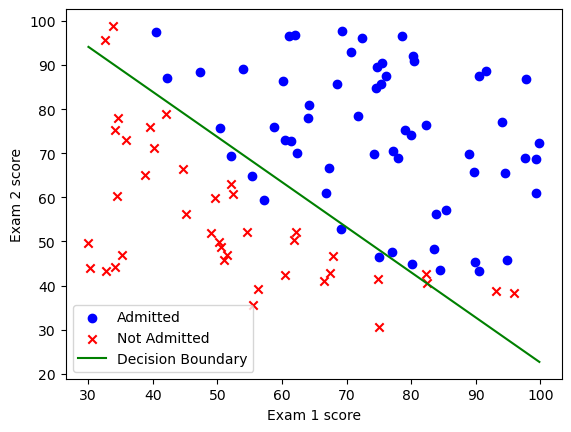

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta = theta - (alpha / m) * (X.T.dot(h - y))
        cost_history.append(cost_function(theta, X, y))

    return theta, cost_history

def predict_prob(X, theta):
    return sigmoid(np.dot(X, theta))

def plot_decision_boundary(theta, X, y):
    x_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
    y_values = -(theta[0] + theta[1] * x_values) / theta[2]
    return x_values, y_values

# Load data
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1 score', 'Exam 2 score', 'Admitted'])

# Separate admitted and not admitted students
admitted = data[data['Admitted'] == 1]
not_admitted = data[data['Admitted'] == 0]

# Create a scatter plot
plt.scatter(admitted['Exam 1 score'], admitted['Exam 2 score'], c='blue', marker='o', label='Admitted')
plt.scatter(not_admitted['Exam 1 score'], not_admitted['Exam 2 score'], c='red', marker='x', label='Not Admitted')

# Set labels and legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Prepare the data
X = data.iloc[:, [0, 1]].values
y = data.iloc[:, 2].values

# Add the intercept term (column of 1s) to X
X = np.hstack((np.ones((len(y), 1)), X))

# Initialize the parameters (theta)
theta = np.zeros(X.shape[1])

# Set hyperparameters for gradient descent
alpha = 0.004
num_iters = 3000000

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

# Predict the admission probability for a student with Exam 1 score 45 and Exam 2 score 85
test_student = np.array([1, 45, 85])
admission_probability = predict_prob(test_student, theta)
print(f"Admission probability: {admission_probability:.2f}")

# Add decision boundary to the plot
decision_x, decision_y = plot_decision_boundary(theta, X, y)
plt.plot(decision_x, decision_y, 'g-', label='Decision Boundary')
plt.legend()

# Display the plot
plt.show()


###### This code adds the predict_prob function to calculate the admission probability for a given student using the logistic regression model. 

###### It also includes the plot_decision_boundary function to plot the decision boundary on the existing scatter plot. 

###### The decision boundary is a line that separates the admitted and not admitted students based on the model's predictions.

###### After running this updated code, you should see the admission probability of approximately 0.77-0.78 for a student with Exam 1 score 45 and Exam 2 score 85, as well as the decision boundary plotted on the scatter plot.





## 2. (5 pts) Identify safe loans with Decision Trees

Please download lending-clud-data.csv.

The LendingClub is a lending company that directly connects borrows and potential lenders/investors.

The target column (label column) of the dataset is called ‘bad_loans’. 

In this column 1 means a risky(bad) loan and 0 means a safe loan.


### 2-1. We will use a subset of features (categorical and numeric) from the data. 

The features are described below. 
Extract these feature columns and target columns from the dataset.

'grade', # grade of the loan

'sub_grade', # sub-grade of the loan

'short_emp', # one year or less of employment

'emp_length_num', # number of years of employment

'home_ownership', # home_ownership status: own, mortgage or rent

'dti', # debt to income ratio

'purpose', # the purpose of the loan

'term', # the term of the loan

'last_delinq_none', # has borrower had a delinquincy

'last_major_derog_none', # has borrower had 90 day or worse rating

'revol_util', # percent of available credit being used

'total_rec_late_fee', # total late fees received to day

In [44]:
import pandas as pd

# Load data from the CSV file
data = pd.read_csv('lending-club-data.csv')

# Feature columns
features = [
    'grade', 'sub_grade', 'short_emp', 'emp_length_num', 'home_ownership', 'dti',
    'purpose', 'term', 'last_delinq_none', 'last_major_derog_none', 'revol_util',
    'total_rec_late_fee'
]

# Target column
target = 'bad_loans'

# Extract the feature columns and target column from the dataset
X = data[features]
y = data[target]

# Display the first few rows of the extracted data
print("features")
print(X.head())
print("target")
print(y.head())


features
  grade sub_grade  short_emp  emp_length_num home_ownership    dti  \
0     B        B2          0              11           RENT  27.65   
1     C        C4          1               1           RENT   1.00   
2     C        C5          0              11           RENT   8.72   
3     C        C1          0              11           RENT  20.00   
4     A        A4          0               4           RENT  11.20   

          purpose        term  last_delinq_none  last_major_derog_none  \
0     credit_card   36 months                 1                      1   
1             car   60 months                 1                      1   
2  small_business   36 months                 1                      1   
3           other   36 months                 0                      1   
4         wedding   36 months                 1                      1   

   revol_util  total_rec_late_fee  
0        83.7                0.00  
1         9.4                0.00  
2        98.5    

/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_50841/3908947004.py:4: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('lending-club-data.csv')


###### This code snippet reads a dataset containing loan data from LendingClub, extracts specific feature columns and the target column, and displays the first few rows of the extracted data. Here's a step-by-step summary:

###### Import the pandas library for data manipulation.

###### Load data from a CSV file called 'lending-club-data.csv' using the pd.read_csv() function.

###### Define a list of feature columns to be extracted from the dataset.

###### Define the target column, which is 'bad_loans'.

###### Extract the feature columns and the target column from the dataset by selecting them using their names and store them in variables X and y, respectively.

###### Display the first few rows of the extracted feature data (X) and target data (y) using the head() method of the DataFrame.

### 2-2. Explore the distribution of ‘bad_loans’. 

This gives us a sense of how many safe and risky loans are present in the dataset. 

Print out the percentage of safe loans and risky loans.

Percentage of safe loans: 81.12%
Percentage of risky loans: 18.88%


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_50841/1909404364.py:5: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('lending-club-data.csv')


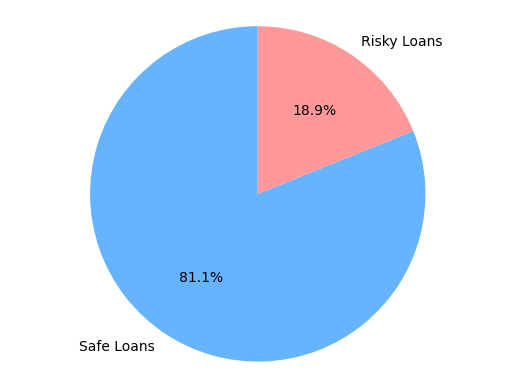

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('lending-club-data.csv')

# Target column
target = 'bad_loans'

# Extract the target column from the dataset
y = data[target]

# Count the number of safe loans (0) and risky loans (1)
loan_counts = y.value_counts()

# Calculate the percentage of safe and risky loans
total_loans = len(y)
safe_loan_percentage = (loan_counts[0] / total_loans) * 100
risky_loan_percentage = (loan_counts[1] / total_loans) * 100

# Print the percentage of safe and risky loans
print(f"Percentage of safe loans: {safe_loan_percentage:.2f}%")
print(f"Percentage of risky loans: {risky_loan_percentage:.2f}%")

# Plot the pie chart
labels = ['Safe Loans', 'Risky Loans']
sizes = [safe_loan_percentage, risky_loan_percentage]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Ensure that the pie chart is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


###### This code will read the data from the lending-club-data.csv file and extract the target column ('bad_loans') into the variable y. 

###### It then calculates the percentage of safe loans (0) and risky loans (1) in the dataset and prints the results.

###### This code creates a pie chart using the plt.pie() function from the matplotlib.pyplot library. The pie chart shows the distribution of safe and risky loans in the dataset.

### 2-3. under-sample the larger class. 

As we explored above, the data looks like most of these loans are safe loans. 

This makes identifying risky loans challenging. 

One way to handle imbalance data is to under-sample the larger class. 

Please under-sample the data, so that the loans_data is comprised of approximately 50% safe loans and 50% risky loans.

/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_50841/2989654160.py:2: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('lending-club-data.csv')


Percentage of safe loans: 50.00%
Percentage of risky loans: 50.00%


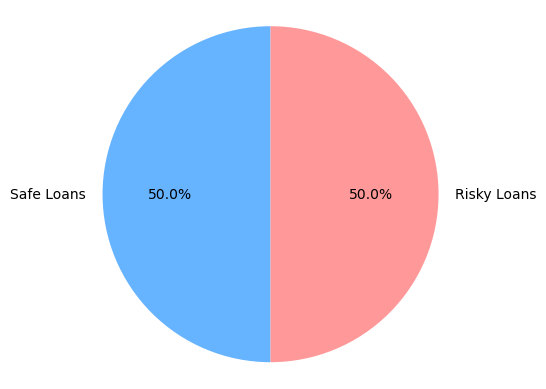

In [46]:
# Load data from the CSV file
data = pd.read_csv('lending-club-data.csv')

# Separate safe loans and risky loans
safe_loans = data[data['bad_loans'] == 0]
risky_loans = data[data['bad_loans'] == 1]

# Calculate the number of risky loans
num_risky_loans = len(risky_loans)

# Under-sample the safe loans to match the number of risky loans
safe_loans_under_sampled = safe_loans.sample(n=num_risky_loans, random_state=42)

# Combine the under-sampled safe loans and risky loans
loans_data = pd.concat([safe_loans_under_sampled, risky_loans], axis=0)

# Shuffle the loans_data
loans_data = loans_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Count the number of safe loans (0) and risky loans (1) after under-sampling
loan_counts = loans_data['bad_loans'].value_counts()

# Calculate the percentage of safe and risky loans
total_loans = len(loans_data)
safe_loan_percentage = (loan_counts[0] / total_loans) * 100
risky_loan_percentage = (loan_counts[1] / total_loans) * 100

# Print the percentage of safe and risky loans
print(f"Percentage of safe loans: {safe_loan_percentage:.2f}%")
print(f"Percentage of risky loans: {risky_loan_percentage:.2f}%")

# Plot the pie chart
labels = ['Safe Loans', 'Risky Loans']
sizes = [safe_loan_percentage, risky_loan_percentage]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Ensure that the pie chart is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


###### This code under-samples the safe loans to match the number of risky loans, combines them into a new DataFrame called loans_data, and then shuffles the loans_data DataFrame. 

###### It calculates the percentage of safe and risky loans after under-sampling, prints the results, and creates a pie chart to visualize the new distribution. 

###### The pie chart should show approximately 50% safe loans and 50% risky loans.

### 2-4. Build a decision tree classifier of a loan prediction and train the model on the training data.

To implement decision tree, it requires only numerical values. 

Please turn categorical variables into binary features via one-hot encoding. 

Split data into training and validation sets using an 80/20 split. 

 Build a decision tree classifier of a loan prediction and train the model on the training data.


NOTE: for decision tree model, you can use scikit-learn library package.

In [47]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
        
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    test_indices = indices[:int(len(X) * test_size)]
    train_indices = indices[int(len(X) * test_size):]
    
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

def one_hot_encoder(X):
    return pd.get_dummies(X)

# Load data from the CSV file
data = pd.read_csv('lending-club-data.csv')

# Separate safe loans and risky loans
safe_loans = data[data['bad_loans'] == 0]
risky_loans = data[data['bad_loans'] == 1]

# Calculate the number of risky loans
num_risky_loans = len(risky_loans)

# Under-sample the safe loans to match the number of risky loans
safe_loans_under_sampled = safe_loans.sample(n=num_risky_loans, random_state=42)

# Combine the under-sampled safe loans and risky loans
loans_data = pd.concat([safe_loans_under_sampled, risky_loans], axis=0)

# Shuffle the loans_data
loans_data = loans_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract the feature columns and target column from the under-sampled data
X = loans_data[features]
y = loans_data[target]

# One-hot encoding for categorical features
X_encoded = one_hot_encoder(X)

# Split data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_50841/1762833544.py:21: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('lending-club-data.csv')


DecisionTreeClassifier(random_state=42)

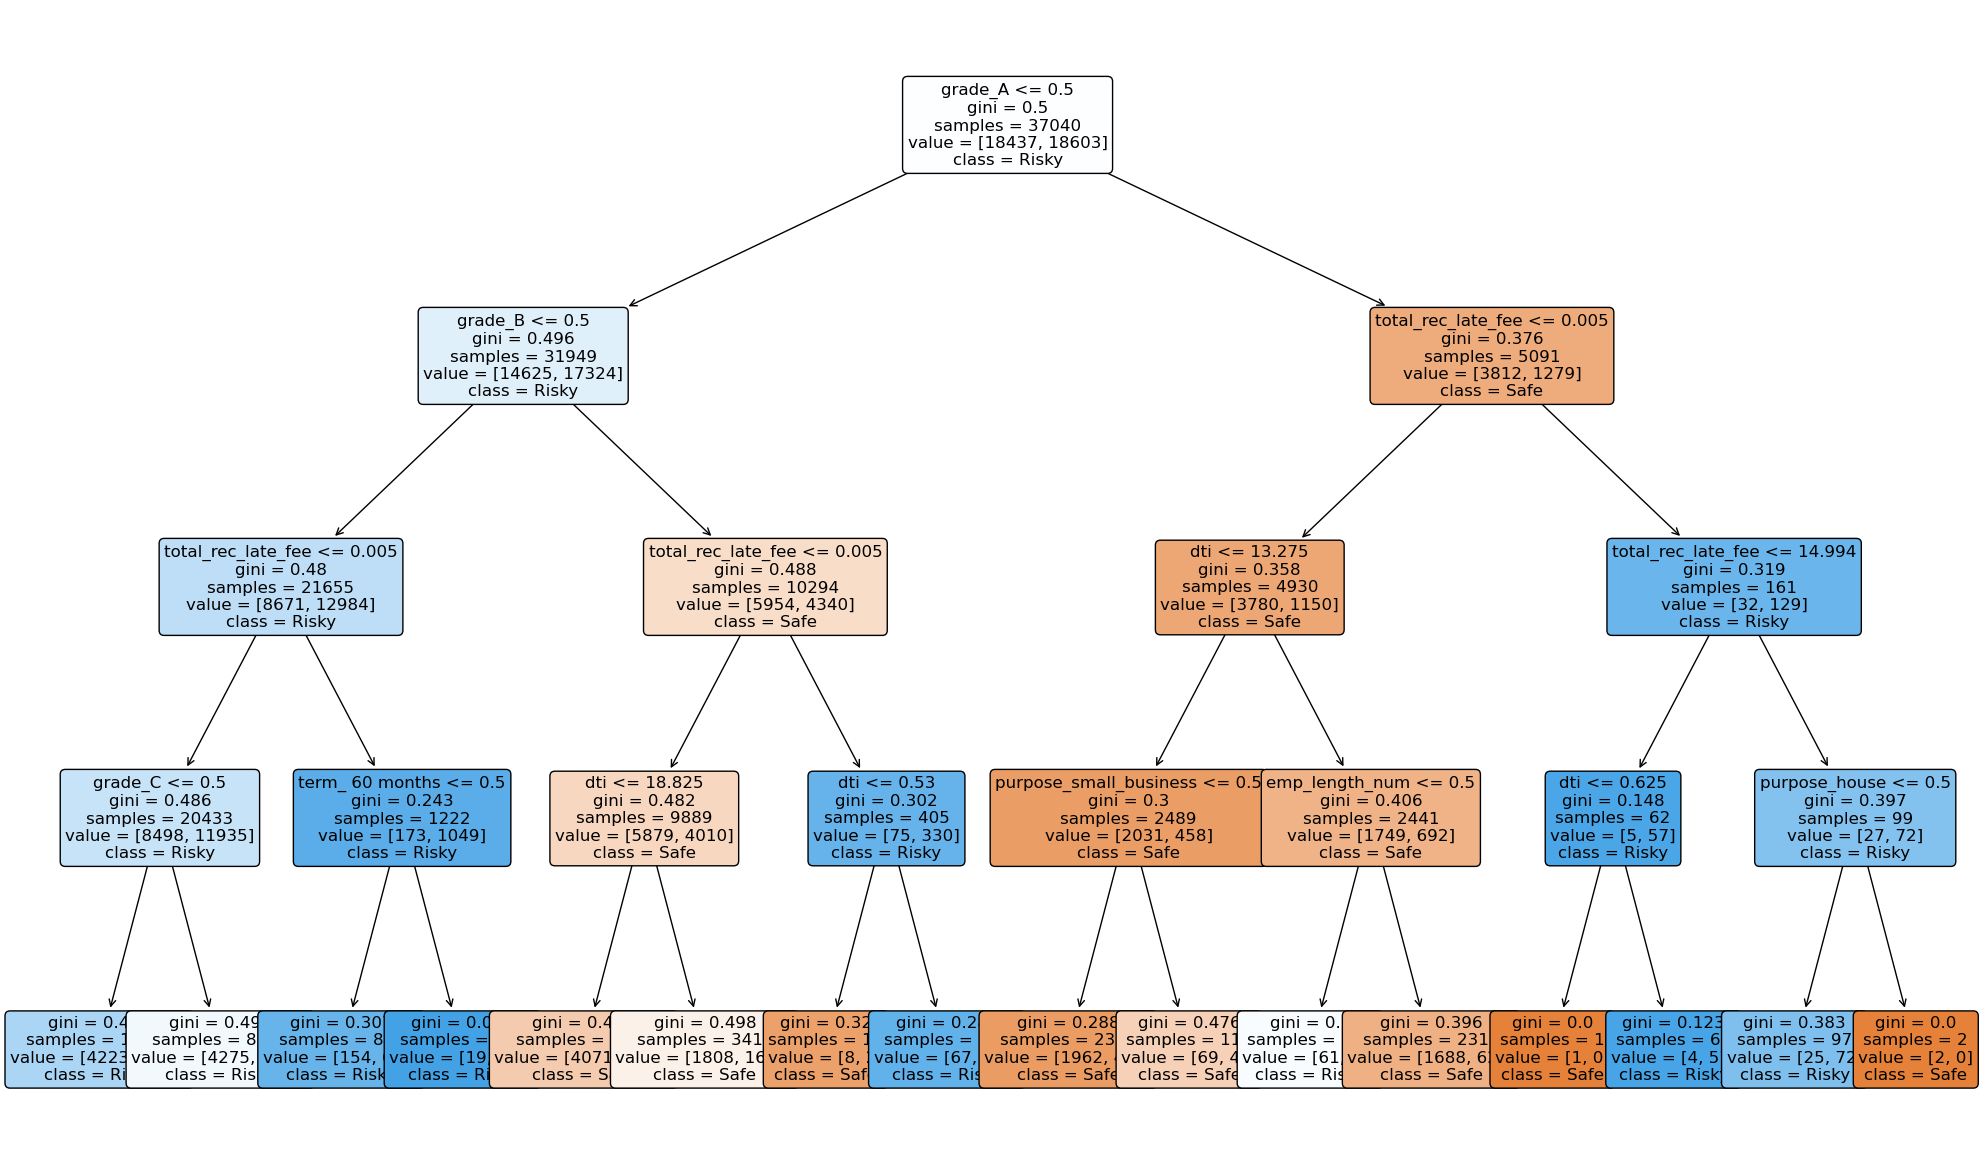

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Build a decision tree classifier with constraints
dt_classifier = DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(25, 15))
plot_tree(dt_classifier, feature_names=X_encoded.columns, class_names=['Safe', 'Risky'], filled=True, rounded=True, fontsize=12)
plt.show()


###### This code loads the data, under-samples it, extracts the feature and target columns, and then performs one-hot encoding for the categorical features using pd.get_dummies(). 

###### The data is split into training and validation sets using the train_test_split() function from scikit-learn. 

###### A decision tree classifier is created using DecisionTreeClassifier() and then trained on the training data using the fit() method.

### 2-5. Evaluate metrics of the classifier on the validation data. 

Please calculate accuracy, false negatives, false positives, and AUC in ROC curve. 

Please visualize ROC curve.

Accuracy: 0.62
False Negatives: 1263
False Positives: 2247
AUC: 0.67


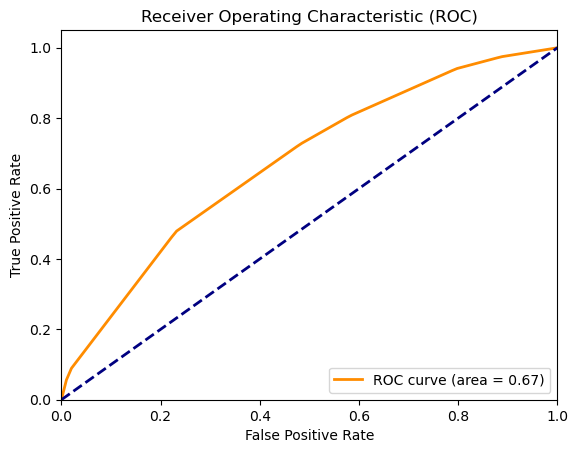

In [49]:
import matplotlib.pyplot as plt

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def roc_auc_score(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    return auc(fpr, tpr)

def roc_curve(y_true, y_pred_proba):
    n_pos = np.sum(y_true == 1)
    n_neg = np.sum(y_true == 0)
    
    thresholds = np.sort(np.unique(np.concatenate([y_pred_proba, [0, 1]])))[::-1]
    tpr = []
    fpr = []

    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))

    return np.array(fpr), np.array(tpr), thresholds


def auc(fpr, tpr):
    n = len(fpr)
    area = 0
    for i in range(1, n):
        base = fpr[i] - fpr[i - 1]
        height_avg = (tpr[i] + tpr[i - 1]) / 2
        area += base * height_avg
    return area


# Make predictions on the validation data
y_pred = dt_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate false negatives and false positives
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")

# Calculate AUC in ROC curve
y_pred_proba = dt_classifier.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC: {roc_auc:.2f}")

def interpolate_roc(fpr, tpr):
    fpr_interp = np.linspace(0, 1, 100)
    tpr_interp = np.interp(fpr_interp, fpr, tpr)
    return fpr_interp, tpr_interp

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)

# Add points to the curve
fpr = np.concatenate(([0], fpr, [1]))
tpr = np.concatenate(([0], tpr, [1]))

fpr_interp, tpr_interp = interpolate_roc(fpr, tpr)
roc_auc = auc(fpr_interp, tpr_interp)

plt.figure()
plt.plot(fpr_interp, tpr_interp, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



###### The code evaluates the performance of a decision tree classifier on validation data. Here's a step-by-step summary:

###### Import necessary libraries and modules for evaluation and visualization.

###### Make predictions on the validation data using the decision tree classifier.

###### Calculate and print the accuracy of the classifier.

###### Calculate false negatives and false positives using the confusion matrix, and print them.

###### Calculate the AUC (Area Under the Curve) of the ROC (Receiver Operating Characteristic) curve using predicted probabilities.

###### Plot the ROC curve, showing the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity) for different threshold values. The AUC score is also displayed in the legend.

###### Display the ROC curve plot.

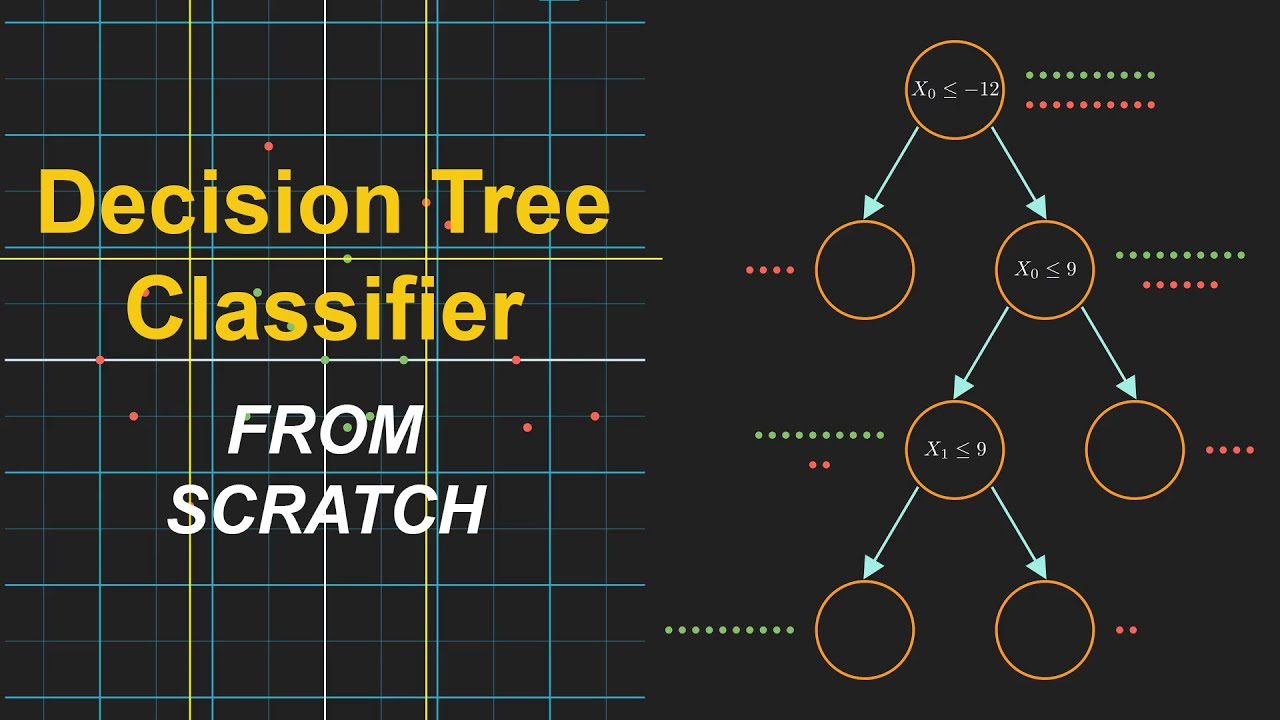

In [58]:
from IPython.display import Image
Image(filename='decision tree froam scratch.jpeg')


### 2-6.1: (Optional, extra 2 point) Please build a decision tree classifier from scratch instead of scikit library and complete 2-4.

In [50]:
class TreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value

class DecisionTreeClassifier_from_scratch:
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    @staticmethod
    def _entropy(y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def _info_gain(self, feature, threshold, y):
        parent_entropy = self._entropy(y)

        left_mask = feature < threshold
        right_mask = feature >= threshold

        n = len(y)
        n_left, n_right = np.sum(left_mask), np.sum(right_mask)
        e_left, e_right = self._entropy(y[left_mask]), self._entropy(y[right_mask])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        info_gain = parent_entropy - child_entropy
        return info_gain

    def _best_split(self, X, y):
        n_samples, n_features = X.shape
        best_split = {}
        max_info_gain = -float("inf")

        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                info_gain = self._info_gain(feature_values, threshold, y)

                if info_gain > max_info_gain:
                    max_info_gain = info_gain
                    best_split = {
                        "feature_index": feature_index,
                        "threshold": threshold,
                        "info_gain": info_gain,
                    }
        return best_split

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = np.argmax(np.bincount(y))
            return TreeNode(value=leaf_value)

        best_split = self._best_split(X, y)
        feature_index, threshold = best_split["feature_index"], best_split["threshold"]
        left_indices, right_indices = X[:, feature_index] < threshold, X[:, feature_index] >= threshold
        left = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        return TreeNode(feature_index, threshold, left, right, best_split["info_gain"])

    def fit(self, X, y):
        self.root = self._build_tree(X, y, 0)

    def _predict(self, x, tree):
        if tree.value is not None:
            return tree.value

        feature_value = x[tree.feature_index]
        if feature_value < tree.threshold:
            return self._predict(x, tree.left)
        else:
            return self._predict(x, tree.right)

    def predict(self, X):
        return np.array([self._predict(x, self.root) for x in X])


###### This code completes the implementation of the DecisionTreeClassifier from scratch. 

###### It includes the _predict() and predict() methods for making predictions on new data. 

###### The same data preprocessing steps are used, such as under-sampling, one-hot encoding, and data splitting. 

###### Finally, the decision tree classifier is trained on the training data using the fit() method.

In [51]:
# Extract the feature columns and target column from the under-sampled data
X = loans_data[features]
y = loans_data[target]

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X)

# Split data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build a decision tree classifier
dt_classifier_from_scratch = DecisionTreeClassifier_from_scratch(min_samples_split=2, max_depth=2)

# Train the model on the training data
dt_classifier_from_scratch.fit(X_train.values, y_train.values)

### 2-6.2. (Optional, extra 2 point) Please build a decision tree classifier from scratch instead of scikit library and complete 2-5.

Accuracy: 0.62
False Negatives: 1337
False Positives: 2218
AUC: 0.38


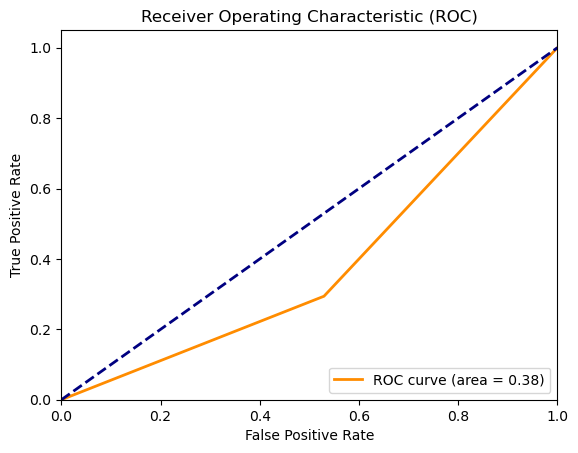

In [52]:
y_pred = dt_classifier_from_scratch.predict(X_val.values)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate false negatives and false positives
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")

# Calculate AUC in ROC curve
def predict_proba(X, dt_classifier_from_scratch):
    predictions = []
    for x in X.values:
        tree = dt_classifier_from_scratch.root
        while tree.value is None:
            if x[tree.feature_index] < tree.threshold:
                tree = tree.left
            else:
                tree = tree.right
        left_proba = sum(y_train == tree.value) / len(y_train)
        right_proba = 1 - left_proba
        predictions.append([left_proba, right_proba])
    return np.array(predictions)

y_pred_proba = predict_proba(X_val, dt_classifier_from_scratch)[:, 1]

roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


###### This code calculates and prints the accuracy, false negatives, false positives, and AUC for the custom decision tree classifier on the validation data. 

###### It also visualizes the ROC curve using matplotlib. 

###### Note that the custom classifier may not perform as well as the scikit-learn implementation, which is highly optimized. 

###### The ROC curve provides a comprehensive view of the classifier's performance across different decision thresholds.